# Ford GoBike Bikeshare Data Exploration

**In this Data Exploration, we will examine individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The [dataset](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv) contains 183412 entries and the data was collected from 02/01/2019 to 03/01/2019. In this data exploration, we will try to figure out what affects Bikeshare usage and Rent duration in a citywide bike share service. Bikeshare usage and Rent duration are key factors to a successful bike share service and we would like to know what what day or age range rents bikes.**

## Preliminary Wrangling

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load the dataset into a pandas dataframe

bikeshare = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#print shape of dataset
print(bikeshare.shape)

(183412, 16)


In [4]:
#check the first five rows of the dataset
bikeshare.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


**For simplified labeling. The parenthesis in start_station_name and end_station_name should be removed.**

In [5]:
#check info of dataset
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

**Above, from the information, we can see the following:**

* **start_time, end_time column are objects. They should be in datetime format.**
* **Change member_birth_year, start_station_id, and end_station_id are floats. They should be changed to integer.**
* **start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year and member_gender columns have null values.** 
* **Duration is in seconds.**

In [6]:
#check number of null values.
bikeshare.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

**Above, start_station_id, start_station_name, end_station_id, end_station_name have 197 null values. Member_birth_year and member_gender columns have 8265 null values. Considering there are overall 183412 entries in this dataset, the null values are less than 5 percent of the overall data. It will be best if we dropped the rows with the null values for this analysis.**

In [7]:
#use describe function to find out more about the dataset
bikeshare.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


* **The min member_birth_year is 1878.000000. This seems incorrect. We will use the group by and count function to investigate any odd values in the member_birth_year.**

In [8]:
#group by member_birth_year and count rows to see the amount of odd birth years amongst bikeshare users.
bikeshare.groupby('member_birth_year').count().head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip
member_birth_year,,,,,,,,,,,,,,,
1878.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1900.0,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
1901.0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
1902.0,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
1910.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


* **It seems there are quite a few odd birth years in this dataset. Since the oldest person living in San Francisco was 112 years old in 2019, we will drop all rows where the birthdate is listed as before 1907. [Link](https://www.thesfnews.com/oldest-resident-of-san-francisco-dies-at-114/73629) to article on oldest living person in San Francisco.**

In [9]:
#Get the period of where data was collected in this dataset.
print(bikeshare.start_time.min(),bikeshare.end_time.max())

2019-02-01 00:00:20.6360 2019-03-01 08:01:55.9750


**Above, the data in this dataset was collected from 02/01/2019 to 03/01/2019**

**Based on the info will need to do following for data wrangling**

* **Change start_time, end_time column into datetime format. Make a separate column of just date. Make column of Day of Week to compare weekday and weekend rental frequencies.**
* **Change member_birth_year from float to integer. Make an age column based on their age in year 2019.**
* **The parenthesis in start_station_name and end_station_name should be removed.**
* **Change start_station_id and end_station_id from float to integer to object.**
* **Drop rows with null values for this dataset.** 
* **Drop all rows where the birthdate is listed as before 1907**

## Data Wrangling

In [10]:
#make copy of bikeshare dataset
bikeshare_c = bikeshare.copy()

In [11]:
#drop rows with null values of copied bikeshare dataset
bikeshare_c = bikeshare_c.dropna()

In [12]:
#check for any null values
bikeshare_c.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [13]:
#change start_time column and end_time column to datetime format
bikeshare_c['start_time'] = pd.to_datetime(bikeshare_c['start_time'])
bikeshare_c['end_time'] = pd.to_datetime(bikeshare_c['end_time'])

In [14]:
#make start_time_date, end_time_date column with dt.date 
bikeshare_c['start_time_date'] = bikeshare_c['start_time'].dt.date
bikeshare_c['end_time_date'] = bikeshare_c['end_time'].dt.date

In [15]:
#make start_hour, end_hour column with dt.date 
bikeshare_c['start_hour'] = bikeshare_c['start_time'].apply(lambda x:x.hour)
bikeshare_c['end_hour'] = bikeshare_c['end_time'].apply(lambda x:x.hour)
#make start_time_dow with .dayofweek
bikeshare_c['start_time_dow'] = bikeshare_c['start_time'].apply(lambda x:x.dayofweek)

In [16]:
#make duration_min column 
bikeshare_c['duration_min'] = round(bikeshare_c['duration_sec']/60).astype(int)

In [17]:
#check newly made columns
bikeshare_c[['start_time_date', 'end_time_date', 'start_hour','end_hour','start_time_dow', 'duration_min']].head()

,start_time_date,end_time_date,start_hour,end_hour,start_time_dow,duration_min
0,2019-02-28,2019-03-01,17,8,3,870
2,2019-02-28,2019-03-01,12,5,3,1031
3,2019-02-28,2019-03-01,17,4,3,608
4,2019-02-28,2019-03-01,23,0,3,26
5,2019-02-28,2019-03-01,23,0,3,30


Above, start_time_dow column represented in numbers. We will change it the day of week by making a dictionary and using the map function.

In [18]:
#make dictionary for numbers representing day of week. Apply it in the 'start_time_dow' column.
dow_dict = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bikeshare_c['start_time_dow'] = bikeshare_c['start_time_dow'].map(dow_dict)

In [19]:
#check 'start_time_dow' column
bikeshare_c['start_time_dow'].head()

0    Thu
2    Thu
3    Thu
4    Thu
5    Thu
Name: start_time_dow, dtype: object

Below, make for loop to remove the information inside parenthesis of start_station_name and end_station_name.

In [20]:
#columns which where we need to remove parenthesis information
n_columns = ['start_station_name','end_station_name']
#for loop to remove parenthesis
for x in n_columns:
    bikeshare_c[x]=bikeshare_c[x].apply(lambda x:x.split("(")[0])

Below, make for loop to change floats into integers.

In [21]:
#columns to change into integers
f_columns = ['member_birth_year','start_station_id','end_station_id']
#for loop to change floats into integers
for x in f_columns:
    bikeshare_c[x]=bikeshare_c[x].astype(int)
#columns to change into objects
i_columns = ['start_station_id','end_station_id']
#for loop to change integers into objects
for x in i_columns:
    bikeshare_c[x]=bikeshare_c[x].astype(object)

In [22]:
#check member_birth_year,start_station_id,end_station_id columns
bikeshare_c[['member_birth_year','start_station_id','end_station_id']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   member_birth_year  174952 non-null  int64 
 1   start_station_id   174952 non-null  object
 2   end_station_id     174952 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [23]:
#make age column by subtracting member_birth_year column from 2019
bikeshare_c['age'] = 2019 - bikeshare_c['member_birth_year']
#make age column from float into int
bikeshare_c['age'] = bikeshare_c['age'].astype(int)

In [24]:
#use print function to check for min and max values
print(bikeshare_c['age'].min(),bikeshare_c['age'].max())

18 141


* **Above, the max age is 141. Drop all rows where member_birth_year is listed as on or before 1907.**

In [25]:
#filter out rows where member_birth_year is before 1907
bikeshare_c = bikeshare_c[bikeshare_c['member_birth_year']>1907]

In [26]:
#check if there are any rows where member_birth_year is before 1907
bikeshare_c[bikeshare_c['member_birth_year']<=1907]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_time_date,end_time_date,start_hour,end_hour,start_time_dow,duration_min,age


In [27]:
#examine first five rows of wrangled dataset
bikeshare_c.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_time_date,end_time_date,start_hour,end_hour,start_time_dow,duration_min,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station,37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,1984,Male,No,2019-02-28,2019-03-01,17,8,Thu,870,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station,37.786375,...,1972,Male,No,2019-02-28,2019-03-01,12,5,Thu,1031,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,1989,Other,No,2019-02-28,2019-03-01,17,4,Thu,608,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,2019-02-28,2019-03-01,23,0,Thu,26,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,1959,Male,No,2019-02-28,2019-03-01,23,0,Thu,30,60


## Visual Data Exploration

### Univariate exploration

##### What is the percentage of Customers vs Subscribers in the bikeshare program in this period?

Text(0.5, 1.0, 'Percentage of Customers vs Subscribers')

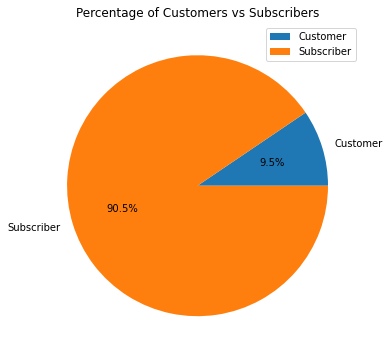

In [28]:
#Make pie chart comparing the percentages of Customers and Subscribers
plt.figure(figsize=(6,6))
pie_chart_data = bikeshare_c.groupby("user_type").count()
my_labels = 'Customer','Subscriber'
ax_01_01 = plt.pie(data=pie_chart_data,x="bike_id",labels=my_labels,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.title('Percentage of Customers vs Subscribers')

**Above, most bikeshare users were subscribers. Only 9.5 percent were customers.**

##### How does the Bikeshare usage compare between genders?

Text(0.5, 0, 'Gender')

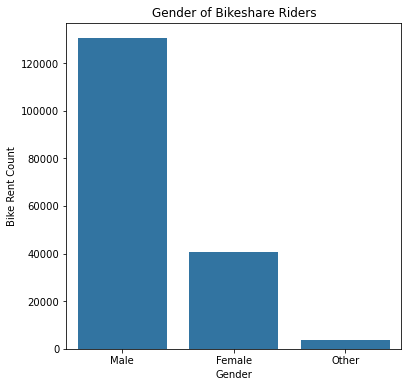

In [29]:
#Use countplot function to compare bike rent count between male,female, and other
plt.figure(figsize = (6,6))
base_color = sns.color_palette()[0]
#order for gender variable
order_1 = ['Male','Female','Other']
sns.countplot(data = bikeshare_c, x = 'member_gender', order = order_1, color = base_color)
plt.title('Gender of Bikeshare Riders')
plt.ylabel('Bike Rent Count')
plt.xlabel('Gender')

**Above, bikeshare users are overwhelmingly male. There are three times more Males than Females and Other combined.**

##### What is the distribution of Bikeshare usage by Age?

Text(0.5, 0, 'Age')

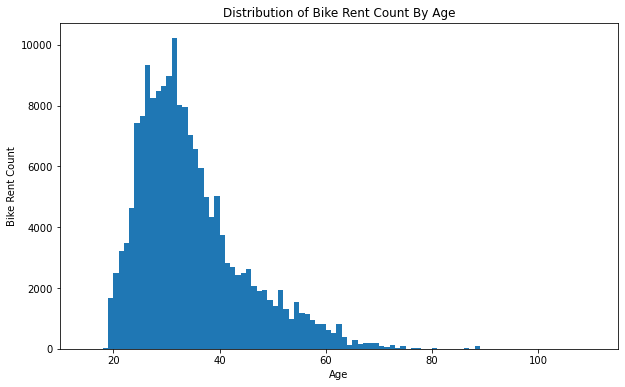

In [265]:
#Use plt.hist to see the distribution of bike rent count by age.
plt.figure(figsize = (10,6))
#Set bin size for histogram
bins_1 = np.arange(10,120,1)
#Set limits for x (Age)
plt.xlim([10,115])
plt.hist(data = bikeshare_c, x = 'age',bins = bins_1 )
plt.title('Distribution of Bike Rent Count By Age')
plt.ylabel('Bike Rent Count')
plt.xlabel('Age')

**Above, the distribution of Age is a right skewed graph. Most bikeshare riders are between 20 - 40 years of age.**

##### What day of week were bikes most rented on?

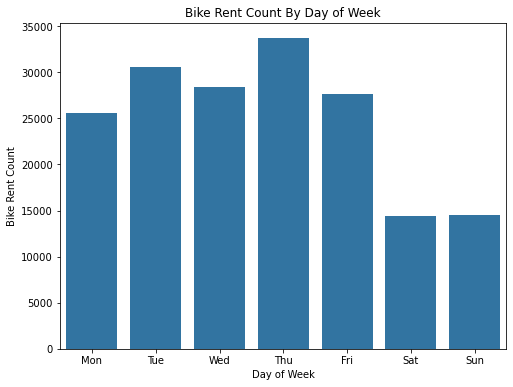

In [317]:
#Make countplot of bike rent count by day of week
plt.figure(figsize=(8,6))
base_color = sns.color_palette()[0]
#Day of week order
dow_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
#use original bikeshare_c dataframe, use start_time_dow as bike rental day of week
sns.countplot(data = bikeshare_c, x='start_time_dow',order = dow_order,color=base_color)
plt.xlabel('Day of Week')
plt.ylabel('Bike Rent Count')
plt.title('Bike Rent Count By Day of Week')
plt.show()

**Above, bikes were least rented on Saturday and Sunday. Bikes were most rented on Thursday. Bikes are rented more on weekdays than weekends.**

##### What hour of day are most bikes rented?

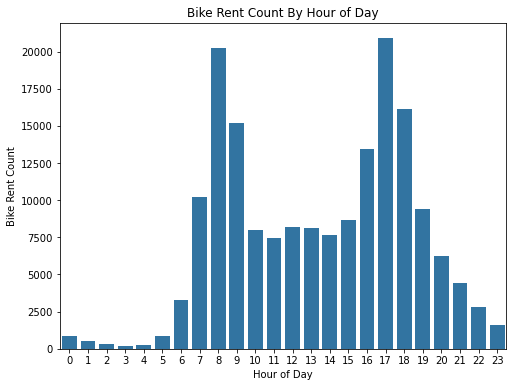

In [318]:
#Use countplot to explore bike rent count by start hour
plt.figure(figsize = (8,6))
base_color = sns.color_palette()[0]
#Use original bikeshare_c dataframe and start_hour column as hour of day
sns.countplot(data = bikeshare_c, x='start_hour',color=base_color)
plt.xlabel('Hour of Day')
plt.ylabel('Bike Rent Count')
plt.title('Bike Rent Count By Hour of Day')
plt.show()

**8:00 and 17:00 (military time) were the most popular times to rent bikes. This is probably because 8:00 was the time when people went to work, and 17:00 was when people went home. It seems that the bikes were used for commuting.**

##### What day was most popular to rent bikes in the period (02/01/2019 to 03/01/2019) of this dataset?

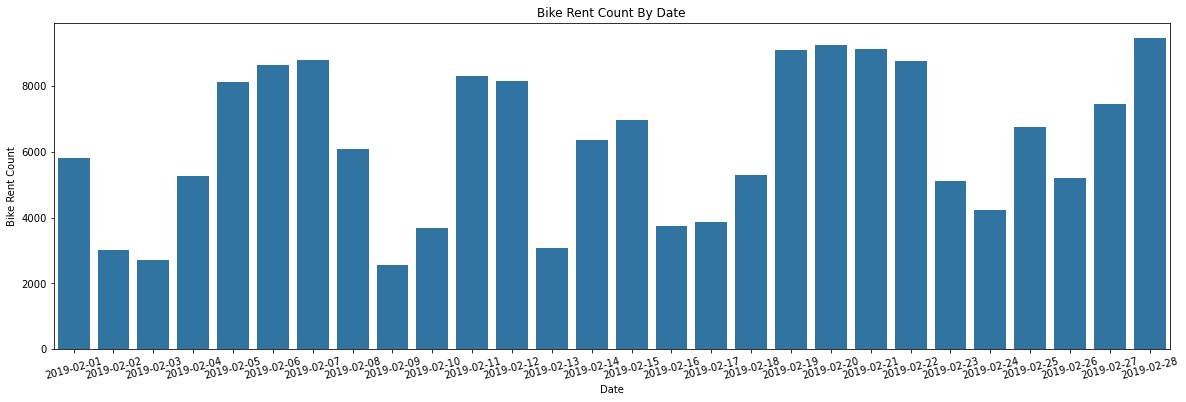

In [320]:
plt.figure(figsize=(20,6))
base_color = sns.color_palette()[0]
#use groupby and index function to make date order from 02/01/19 to 02/28/19
date_order = bikeshare_c.groupby('start_time_date').sum().index
#use groupby and index function to make date order from 02/01/19 to 02/28/19
sns.countplot(data = bikeshare_c, x='start_time_date',color=base_color, order = date_order)
#rotate xticks
plt.xticks(rotation=15)
plt.xlabel('Date')
plt.ylabel('Bike Rent Count')
plt.title('Bike Rent Count By Date')
plt.show()

**Bikes were most rented on 02/28/19. It was a thursday. There were other days of the month with similar bike rent count numbers. It seems that bike rent goes slightly higher on the latter dates of the month, which can be due to the weather getting warmer.**

### Bivariate Plots

##### What is the distribution bike rent count of comparing age and gender?

<Figure size 1008x432 with 0 Axes>

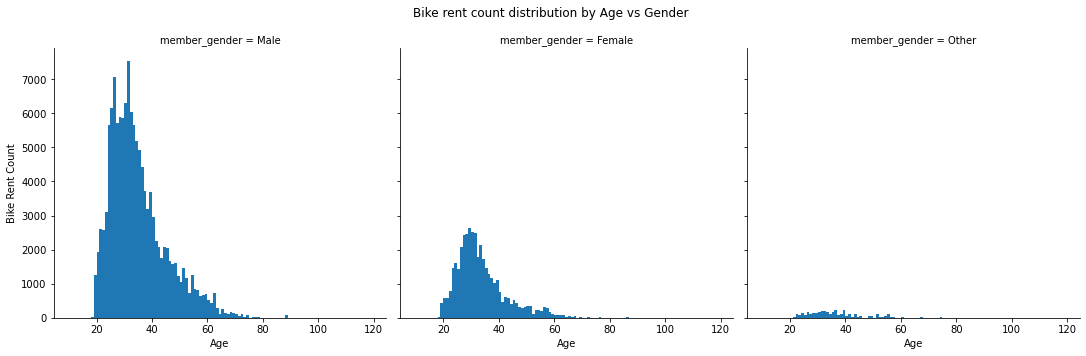

In [274]:
#Use FacetGrid and plt.hist to show differences in the distribution of bike rent count by age
#between genders.
plt.figure(figsize = (14,6))
#order for gender variable
order_1 = ['Male','Female','Other']
#set bin size for histogram
bins_1 = np.arange(10,120,1)
ax = sns.FacetGrid(data=bikeshare_c, col = 'member_gender', col_order=order_1, height=5)
#Add title to FacetGrid plot
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Bike rent count distribution by Age vs Gender')
ax.map(plt.hist, 'age', bins = bins_1)
ax.set_ylabels('Bike Rent Count')
ax.set_xlabels('Age')
plt.show()

**Above, the distribution of Age is a right skewed graph for males and females. Most bikeshare riders are between 20 - 40 years of age for males and females. Other gender is a multimodal distribution**

##### What is the Bikeshare usage per day of week vs gender?

<Figure size 1008x432 with 0 Axes>

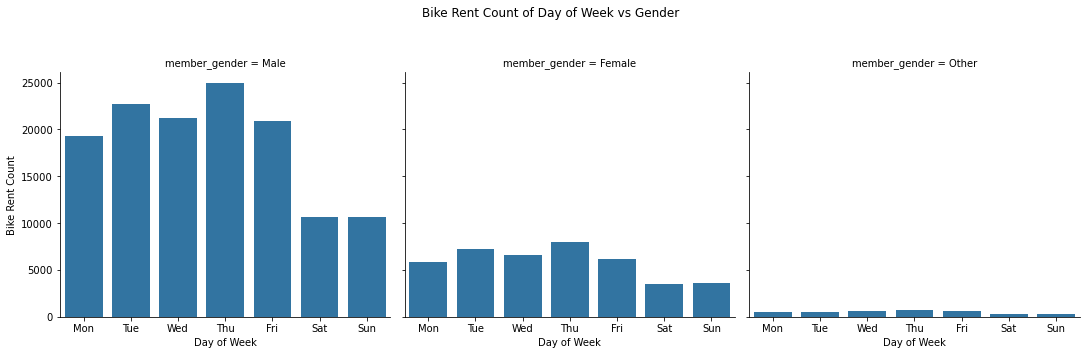

In [323]:
#Use Facetgrid and countplot to compare bike rent count by day of week by gender
plt.figure(figsize=(14,6))
#Day of week order
dow_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
#Gender order
order_1 = ['Male','Female','Other']
#use original bikeshare_c dataframe, set member_gender as columns
ax3 = sns.FacetGrid(data = bikeshare_c, col = 'member_gender', col_order = order_1, height = 5)
#use countplot use start_time_dow as bike rental day of week
ax3.map(sns.countplot,'start_time_dow', order = dow_order)
ax3.set_xlabels('Day of Week')
ax3.set_ylabels('Bike Rent Count')
#Add title to FacetGrid plot
ax3.fig.subplots_adjust(top=0.8)
ax3.fig.suptitle('Bike Rent Count of Day of Week vs Gender')
plt.show()

**Twice as many Males rent bikes during the weekday than the weekend. Females and Other tend to rent bikes during the weekday, but the difference of Bikeshare usage between weekdays and weekends are not as extreme as Males.**

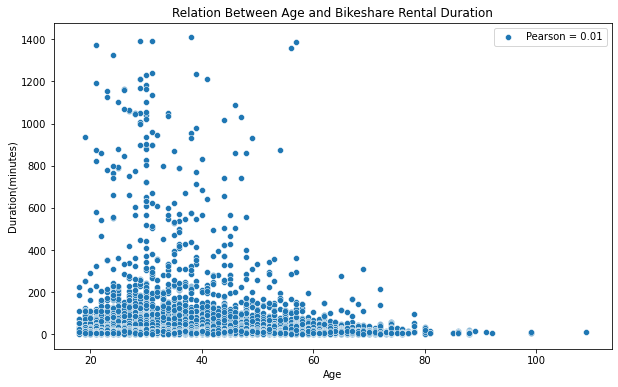

In [32]:
#import pearsonr from scipy.stats
from scipy.stats import pearsonr
#get pearson r value with pearsonr function
r, pvalue = pearsonr(bikeshare_c['age'], bikeshare_c['duration_min'])
plt.figure(figsize = (10,6))
#make scatterplot with pearsonr label
sns.scatterplot(data = bikeshare_c, x = 'age', y = 'duration_min',label=f'Pearson = {r:.2f}')
plt.xlabel('Age')
plt.ylabel('Duration(minutes)')
plt.title('Relation Between Age and Bikeshare Rental Duration')
plt.show()

**Above, the pearson r value of Age and Duration is 0.01. There is no correlation between Age and bike rental duration. Also, there seem to be extreme outliers**

**Below, use count function to see how many bike rentals had a duration of over 100 minutes.**

In [188]:
#count function to see how many bike rentals had a duration of over 100 minutes
bikeshare_c[bikeshare_c['duration_min']>100]['bike_id'].count()

700

**Above, only 700 trips had a duration of over 100 minutes. Since there are over 183412 entries in this dataset. We will filter out bike trips over a 100 minutes for duration analysis as these outliers can be misleading.** 

**Below, make a new dataframe bikeshare_c_sub filtering out trips lasting longer than 100 minutes.**

In [189]:
bikeshare_c_sub = bikeshare_c[bikeshare_c['duration_min']<=100]

##### What day of week has the longest mean duration time?

In [ ]:
#Get unique values for Day of Week
bikeshare_c.start_time_dow.unique()

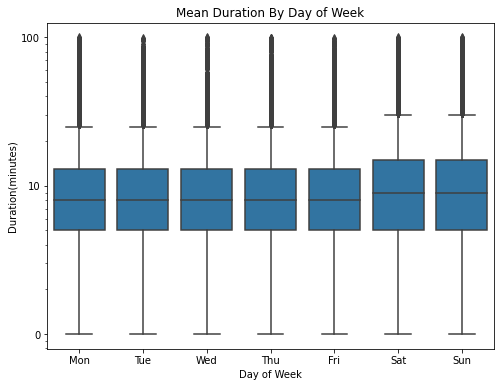

In [316]:
#Make box plot to compare mean duration time by day of week
plt.figure(figsize=(8,6))
base_color = sns.color_palette()[0]
#order for Day of Week
dow_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
#Use bikeshare_c_sub data as the information pertains to duration. Use start_time_dow as day of week.
ax_04 = sns.boxplot(data = bikeshare_c_sub, x='start_time_dow' ,y='duration_min',order = dow_order,color=base_color)
plt.xlabel('Day of Week')
plt.ylabel('Duration(minutes)')
plt.title('Mean Duration By Day of Week')
#put y axis on a log scale
plt.yscale('log')
#change tick labels on y axis
plt.yticks([1e0, 1e1, 1e2], ['0', '10', '100'])
ax_04.set_yticklabels([],minor = True)
plt.show()

**Above, the mean duration is around the same for all days of the week. The mean duration for Saturday and Sunday are slightly higher.**

### Multivariate Plots

##### How does Bikeshare usage compare between customers and subscribers accounting for age and duration

In [242]:
#function to make heatmap refenced from udacity diamond project
def heat_grid(x, y, **kwargs):
    palette = kwargs.pop('color')
    #set x and y bin
    bins_x = np.arange(0,bikeshare_c_sub['age'].max()+10, 10)
    bins_y = np.arange(0,bikeshare_c_sub['duration_min'].max()+10,5)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
    #set x and y ticks
    plt.xticks(bins_x)
    plt.yticks(bins_y)

<Figure size 1008x576 with 0 Axes>

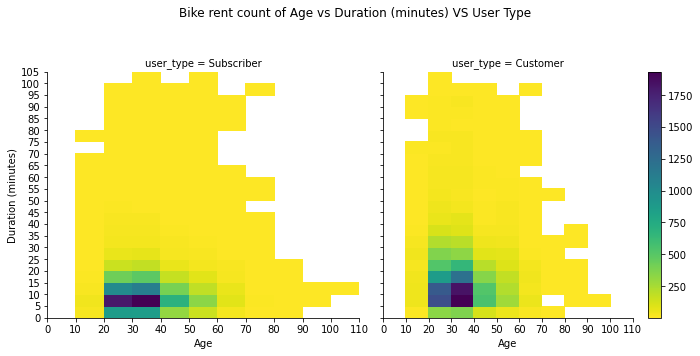

In [245]:
#Multivariate plot comparing bike rent count by age vs duration vs user type.
plt.figure(figsize=(14,8))
#Use bikeshare_c_sub data as the information pertains to duration. Use user_type as column
g_2 = sns.FacetGrid(data = bikeshare_c_sub, col = 'user_type',height = 5)
g_2.map(heat_grid,'age','duration_min')
#Add title to FacetGrid plot
g_2.fig.subplots_adjust(top=0.8)
g_2.fig.suptitle('Bike rent count of Age vs Duration (minutes) VS User Type')
#Set x and y labels
g_2.set_ylabels('Duration (minutes)')
g_2.set_xlabels('Age')
plt.colorbar()
plt.show()

**Above, for both subscribers and customers, the bike rent count is highest amongst people between 20 and 40 years old. However, for customers there are more bike rent counts where duration is between 25 and 45 minutes.**

##### What is the average duration of rental vs user type vs gender?

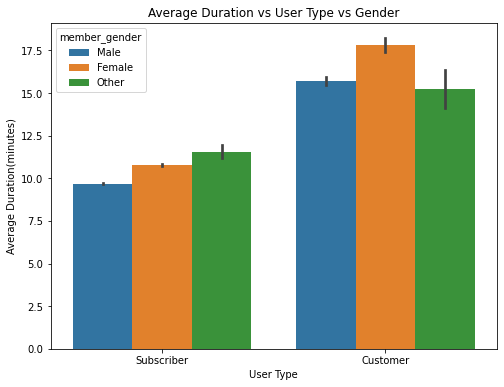

In [111]:
#Make bar plot comparing Average Duration and User Type with hue as 'member gender'
plt.figure(figsize=(8,6))
#Order for hue
order_1 = ['Male','Female','Other']
base_color = sns.color_palette()[0]
#Use bikeshare_c_sub data as the information pertains to duration
sns.barplot(data=bikeshare_c_sub, x = 'user_type', y = 'duration_min', hue = 'member_gender', hue_order =order_1)
plt.xlabel('User Type')
plt.ylabel('Average Duration(minutes)')
plt.title('Average Duration vs User Type vs Gender')
plt.show()

**Above, customers average rental duration time is around 5 minutes longer than subscribers across all genders. The standard deviation is larger amongst renters of 'Other' gender.**

##### How does Average Duration progress by age and is there a difference between genders?

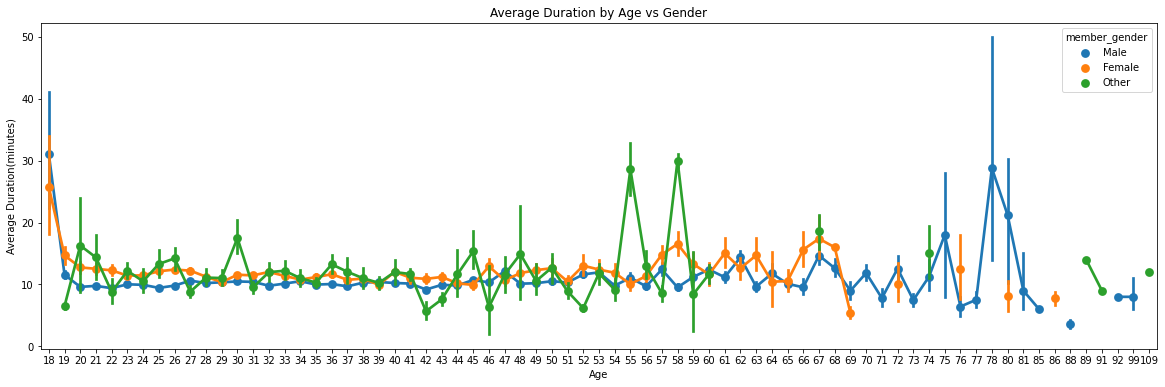

In [112]:
#Make point plot comparing Age and average duration. Set hue to 'member_gender'
plt.figure(figsize = (20,6))
#order of hue
order_1 = ['Male','Female','Other']
#Use bikeshare_c_sub data as the information pertains to duration
ax3 = sns.pointplot(data = bikeshare_c_sub, x = 'age', y='duration_min', hue = 'member_gender')
plt.xlabel('Age')
plt.ylabel('Average Duration(minutes)')
plt.title('Average Duration by Age vs Gender')
plt.show();

**Above, although there are peaks at certain ages, most ages rent bikes for 10 - 15 minutes. Males and Females age 18 tend to rent longer than other ages, renting between 25 - 35 minutes.
Other gender has peaks at age 55 and 58 as these ages rent between 30 -35 minutes. There is a peak for males between age 77 and 81 as they rented between 20 - 35 minutes on average.**

### Univariate Plot and Map Plot

**Below, we will make Univariate and Map plots of of the top 10 start station ids and the top 10 end station ids and make a map plot**

##### What are the start stations with the top 10 bike rent count?

In [87]:
#Check the count of start station ids
bikeshare_c.start_station_id.nunique()

329

**Above, there are 329 start station ids. For brevity, we will only get the bike rent count of the top 10 station ids.**

In [44]:
#use value_counts function to get top 10 start_station ids, location names and bike rent count
bikeshare_c_start_l0 = bikeshare_c[['start_station_name','start_station_id']].value_counts().head(10)

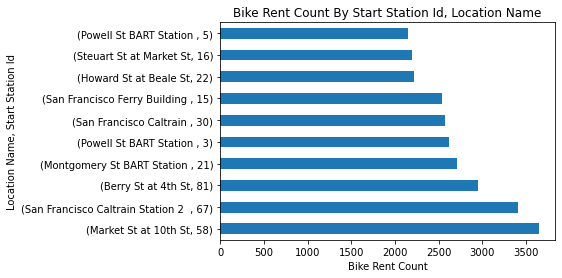

In [281]:
#use plot function to show the top 10 start_station ids, location names and bike rent count 
bikeshare_c_start_l0.plot(kind = 'barh')
plt.xlabel('Bike Rent Count')
plt.ylabel('Location Name, Start Station Id')
plt.title('Bike Rent Count By Start Station Id, Location Name')
plt.show()

**Above, start station id 58 in Market St at 10th St has the most bike rent count with a little over 3500.** 

##### What are the end stations with the top 10 bike rent count?

In [196]:
#use value_counts function to get top 10 end_station ids and the names of where the end stations are.
bikeshare_c_end_l0 = bikeshare_c[['end_station_name','end_station_id']].value_counts().head(10)

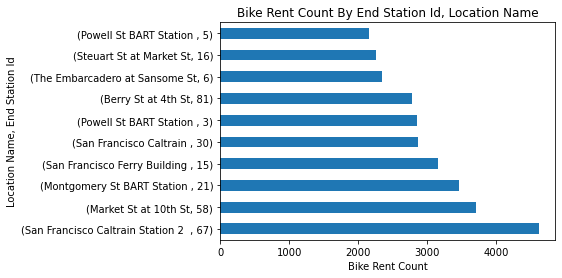

In [284]:
#use plot function to show the top 10 end station ids and the names of the location 
bikeshare_c_end_l0.plot(kind = 'barh')
plt.xlabel('Bike Rent Count')
plt.ylabel('Location Name, End Station Id')
plt.title('Bike Rent Count By End Station Id, Location Name')
plt.show()

**Above, end station id 67 in San Francisco Caltrain Station 2 has the most bike rent count with over 4000. 9 of the top 10 end station ids overlap with the top 10 start station ids.**

##### How does the bike rent count of the top 10 start station ids look in the San Francisco map?

In [48]:
#Use value_counts function to get top 10 start station ids and bike rent count
bikeshare_c_start_l0_id = bikeshare_c.start_station_id.value_counts().head(10)

In [49]:
#Make series into a dataframe
data_1 = pd.DataFrame(bikeshare_c_start_l0_id)

In [50]:
#reset index to make 'index' column which has start station id into a separate column
data_1 = data_1.reset_index()

In [53]:
#Change 'index' column to change start station id from integer to string
data_1['index'] = data_1['index'].astype('string')

In [54]:
#Make function to change start station id information into zip code for cloropleth map.
#Searched location names in google maps to get zip code data.
def data_f(data):
        if data == '58' or data == '5' or data == '3':
            return '94102'
        if data == '67' or data == '30':
            return '94107'
        if data == '81':
            return '94158'
        if data == '21':
            return '94104'
        if data == '15' or data == '22' or data == '16':
            return '94105'
        else:
            return data

In [71]:
#make for loop to apply function on the 'index' column
for x in data_1['index']:
    data_1['index'] = data_1['index'].apply(data_f)

In [74]:
#rename column names index into ZIP and start_station_id into count
data_1.rename(columns = {'index':'ZIP','start_station_id':'count'},inplace=True)
#check data_1 dataframe with zipcode of start station ids and bike rent count
data_1

,ZIP,count
0,94102,3649
1,94107,3406
2,94158,2952
3,94104,2711
4,94102,2620
5,94107,2572
6,94105,2540
7,94105,2216
8,94105,2191
9,94102,2144


In [233]:
#Visualize bike rent count of the zip codes where top 10 start station ids 
#are in the san franciso map with data from the Internet.
#import necessary libraries
import folium
from folium import plugins
import json
import requests
#geojson found in UC Berkely GeoData Repository
url = "https://geodata.lib.berkeley.edu/download/file/ark28722-s7888q-geojson.json"
san_geo = f'{url}'
#Make folium map of San Francisco with black lines separating different zip codes
g_map=folium.Map(location=[37.77,-122.4],zoom_start=12)
folium.GeoJson(san_geo,style_function=
               lambda feature:{'fillColor':'#ffff00','color':'black','weight':2,'dashArray':'5,5'}).add_to(g_map)
g_map

#use cloropleth and data_1 dataframe to color zipcodes by bike rent count
m_color_1=folium.Map(location=[37.77,-122.74],zoom_start=10)
folium.Choropleth(geo_data=san_geo,
                 data=data_1,
                 columns=['ZIP','count'],
                 key_on='feature.properties.ZIP',
                 fill_color='YlOrRd',     
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  highlight=True,
                  legend_name='Bike rent count').add_to(m_color_1)


#title for map

loc = 'Bike rent count of zip codes of Top 10 start station ids in SF'

title_html = '''
             <h3 align="bottom" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)  

m_color_1.get_root().html.add_child(folium.Element(title_html))



m_color_1

**The top 10 start stations all seem to be in the northeast part of San Francisco where the rail to the other side of the bay area is.**

In [297]:
#Use value_counts function to get top 10 start station ids and bike rent count
bikeshare_c_end_l0_id = bikeshare_c.end_station_id.value_counts().head(10)
#Make series into DataFrame
data_2 = pd.DataFrame(bikeshare_c_end_l0_id)
#reset index to make 'index' column which has end station id into a separate column
data_2 = data_2.reset_index()
#Change 'index' column value from integer to string
data_2['index'] = data_2['index'].astype('string')

In [298]:
#Make function to change end station id information into zip code for cloropleth map.
#Searched location names in google maps to get zip code data.
def data_f_2(data):
        if data == '58' or data == '5' or data == '3':
            return '94102'
        if data == '67' or data == '30':
            return '94107'
        if data == '81':
            return '94158'
        if data == '21':
            return '94104'
        if data == '15' or data == '16':
            return '94105'
        if data == '6':
            return '94111'
        else:
            return data

In [299]:
#make for loop to apply function on the 'index' column
for x in data_2['index']:
    data_2['index'] = data_2['index'].apply(data_f_2)

In [300]:
#rename column names index into ZIP and start_station_id into count
data_2.rename(columns = {'index':'ZIP','end_station_id':'count'},inplace=True)
#check data_2 dataframe with zip codes of top 10 end station ids and bike rent count
data_2

,ZIP,count
0,94107,4622
1,94102,3709
2,94104,3461
3,94105,3151
4,94107,2860
5,94102,2854
6,94158,2782
7,94111,2341
8,94105,2264
9,94102,2153


In [302]:
#Visualize bike rent count of the zip codes where top 10 end station ids 
#are in the san franciso map with data from the Internet.

#geojson found in UC Berkely GeoData Repository
url = "https://geodata.lib.berkeley.edu/download/file/ark28722-s7888q-geojson.json"
san_geo = f'{url}'

#Make folium map of San Francisco with black lines separating different zip codes
g_map=folium.Map(location=[37.77,-122.4],zoom_start=12)#The boundary file is passed in as the first parameter of GeoJson, and GeoJson also has the style_function parameter. It is given by an anonymous function.
folium.GeoJson(san_geo,style_function=
               lambda feature:{'fillColor':'#ffff00','color':'black','weight':2,'dashArray':'5,5'}).add_to(g_map)

#use cloropleth and data_1 dataframe to color zipcodes by bike rent count
m_color=folium.Map(location=[37.77,-122.74],zoom_start=12)
folium.Choropleth(geo_data=san_geo,
                 data=data_2,
                 columns=['ZIP','count'],
                 key_on='feature.properties.ZIP',
                 fill_color='YlOrRd',     #Notice the parameters here, lowercase L and number 0.
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  highlight=True,
                  legend_name='Bike rent count').add_to(m_color)

#title for map
loc = 'Bike rent count of zip codes of Top 10 end station ids in SF'

title_html = '''
             <h3 align="bottom" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)  

m_color.get_root().html.add_child(folium.Element(title_html))



m_color


**The top 10 end stations all seem to be in the northeast part of San Francisco where the rail to the other side of the bay area is. The end station cloropleth map is very similar to the start station map**

### Key Points from the Visual Data Exploration

* **Most bike share users are subscribers. Over 90 percent are subscribers while 9.5 percent are customers**
* **People between ages 20 - 40 are the majority of bike renters.**
* **Males are three times as more likely to rent bikes than females.**
* **Bikes are rented on more on weekdays than weekends.**
* **8:00 and 17:00 military time are when bikes are usually rented. It seems alot of bikes are rented for commuting**
* **There is no correlation between bike rent duration and overall age.**
* **On average, customers have a rental duration time 5 minutes longer than subscribers.**